# EP indel size distribution

In [73]:
genes = ['Calr', 'Myl6', 'Calm2', 'Rpl39', 'Cfl1', 'Acta1', 'Hsp90b1', 'Calm1', 'Hint1', 'Btf3', 'Lgals1', 'Slc25a3', 'Tpt1', 'Hsp90ab1', 'Fth1']

In [74]:
dirs = [ filename for filename in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC') if filename.endswith('Dox_r1') ]

In [75]:
Indel_df = pd.DataFrame()
for counter in range(0,15):
    filename = [ filename for filename in dirs if genes[counter] in filename][0]
    print(filename)
    #break
    Deletion_histogram_file = [filename for filename in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/'+ filename) if filename.startswith('Deletion_histogram')][0]
    Deletion_histogram = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/'+ filename+'/'+Deletion_histogram_file,sep='\t')
    Deletion_histogram.columns = ['size','fq']
    Deletion_histogram['type'] = 'Deletion'
    Insertion_histogram_file = [filename for filename in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/'+ filename) if filename.startswith('Insertion_histogram')][0]
    Insertion_histogram = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/'+ filename+'/'+Insertion_histogram_file,sep='\t')
    Insertion_histogram.columns = ['size','fq']
    Insertion_histogram['type'] = 'Insertion'
    
    if genes[counter] == 'Btf3':
        Btf3_Dox_free_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/R705/crispresso2/CRISPResso_on_Btf3_2_Dox-free_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
        Btf3_Dox_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/R705/crispresso2/CRISPResso_on_Btf3_2_Dox_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
        Btf3_Dox_AF_noise = Btf3_Dox_AF[Btf3_Dox_AF['Aligned_Sequence'].isin(Btf3_Dox_free_AF['Aligned_Sequence'])]
        inserted_noise_reads = Btf3_Dox_AF_noise.groupby(['n_inserted']).sum(['#Reads']).reset_index()
        inserted_noise_reads = inserted_noise_reads[inserted_noise_reads['n_inserted']!=0]
        deleted_noise_reads = Btf3_Dox_AF_noise.groupby(['n_deleted']).sum(['#Reads']).reset_index()
        deleted_noise_reads = deleted_noise_reads[deleted_noise_reads['n_deleted']!=0]
        for n in deleted_noise_reads['n_deleted']:
            noise_reads = int(deleted_noise_reads[deleted_noise_reads['n_deleted']==n]['#Reads'])
            Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'] = int(Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'])-noise_reads
        for n in inserted_noise_reads['n_inserted']:
            noise_reads = int(inserted_noise_reads[inserted_noise_reads['n_inserted']==n]['#Reads'])
            Insertion_histogram.loc[Insertion_histogram['size']==n,'fq'] = int(Insertion_histogram.loc[Insertion_histogram['size']==n,'fq'])-noise_reads

    #if genes[counter] == 'Rpl39':
        
    Indel_df = pd.concat([Indel_df,Insertion_histogram,Deletion_histogram],axis=0)
    #print(Insertion_histogram)

CRISPResso_on_Calr_1_Dox_r1
CRISPResso_on_Myl6_1_Dox_r1
CRISPResso_on_Calm2_1_Dox_r1
CRISPResso_on_Rpl39-1_Dox_r1
CRISPResso_on_Cfl1_1_Dox_r1
CRISPResso_on_Acta1_1_Dox_r1
CRISPResso_on_Hsp90b1_1_Dox_r1
CRISPResso_on_Calm1_1_Dox_r1
CRISPResso_on_Hint1_2_Dox_r1
CRISPResso_on_Btf3_2_Dox_r1


/tmp/ipykernel_82458/1003819869.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  noise_reads = int(deleted_noise_reads[deleted_noise_reads['n_deleted']==n]['#Reads'])
/tmp/ipykernel_82458/1003819869.py:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'] = int(Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'])-noise_reads
/tmp/ipykernel_82458/1003819869.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  noise_reads = int(inserted_noise_reads[inserted_noise_reads['n_inserted']==n]['#Reads'])
/tmp/ipykernel_82458/1003819869.py:28: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the futur

CRISPResso_on_Lgals1-1_Dox_r1
CRISPResso_on_Slc25a3-1_Dox_r1
CRISPResso_on_Tpt1_1_Dox_r1
CRISPResso_on_Hsp90ab1_1_Dox_r1
CRISPResso_on_Fth1_2_Dox_r1


In [76]:
Indel_df = Indel_df[Indel_df['size']!=0]
#Indel_df = Indel_df[abs(Indel_df['size'])<=30]
Indel_df = Indel_df.groupby(['size','type'])['fq'].sum().reset_index()
Indel_df['Proportion'] = Indel_df['fq'] / Indel_df['fq'].sum()
Indel_df['size'] = Indel_df['size'].astype('int')
Indel_df['Proportion'] = [ Proportion*(-1) if indel_size > 0 else Proportion for indel_size,Proportion in zip(Indel_df['size'],Indel_df['Proportion']) ]
Indel_df['size'] = [ indel_size*(-1) if indel_size < 0 else indel_size for indel_size in Indel_df['size'] ]

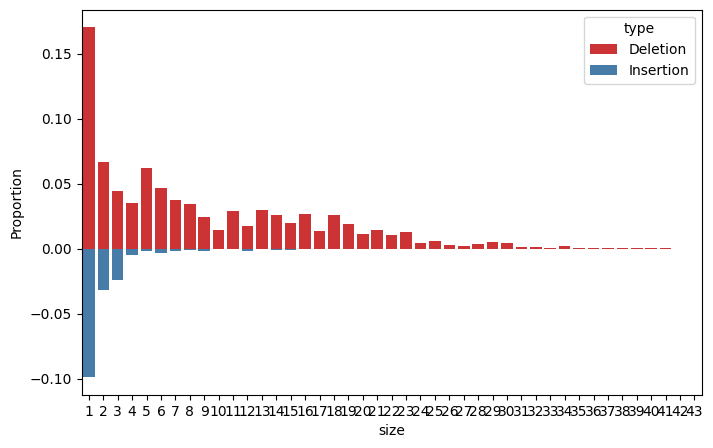

In [77]:
colors =[ '#377eb8' if x > 0 else '#e41a1c' for x in Indel_df['Proportion']]
plt.figure(figsize=(8, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(8, 5)
sns.barplot(data=Indel_df,x='size', y='Proportion',hue='type', palette={'Insertion': '#377eb8', 'Deletion': '#e41a1c'}, dodge=False)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure1/In_vitro_EPC_indel_length_distribution.pdf')

# 3T3 indel size distribution

In [16]:
import pandas as pd
import os

In [17]:
genes = ['Calr', 'Myl6', 'Calm2', 'Rpl39', 'Cfl1', 'Acta1', 'Hsp90b1', 'Calm1', 'Hint1', 'Btf3', 'Lgals1', 'Slc25a3', 'Tpt1', 'Hsp90ab1', 'Fth1']

In [18]:
dirs = [ filename for filename in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3') if filename.endswith('Dox_r1') ]

In [19]:
dirs

['CRISPResso_on_Fth1_2_Dox_r1',
 'CRISPResso_on_Btf3_2_Dox_r1',
 'CRISPResso_on_Myl6_1_Dox_r1',
 'CRISPResso_on_Hint1_2_Dox_r1',
 'CRISPResso_on_Hsp90ab1_1_Dox_r1',
 'CRISPResso_on_Calm2_1_Dox_r1',
 'CRISPResso_on_Lgals1-1_Dox_r1',
 'CRISPResso_on_Acta1_1_Dox_r1',
 'CRISPResso_on_Slc25a3-1_Dox_r1',
 'CRISPResso_on_Tpt1_1_Dox_r1',
 'CRISPResso_on_Calm1_1_Dox_r1',
 'CRISPResso_on_Hsp90b1_1_Dox_r1',
 'CRISPResso_on_Calr_1_Dox_r1',
 'CRISPResso_on_Cfl1_1_Dox_r1',
 'CRISPResso_on_Rpl39-1_Dox_r1']

In [20]:
Indel_df = pd.DataFrame()
for counter in range(0,15):
    filename = [ filename for filename in dirs if genes[counter] in filename][0]
    print(filename)
    #break
    Deletion_histogram_file = [filename for filename in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/'+ filename) if filename.startswith('Deletion_histogram')][0]
    Deletion_histogram = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/'+ filename+'/'+Deletion_histogram_file,sep='\t')
    Deletion_histogram.columns = ['size','fq']
    Deletion_histogram['type'] = 'Deletion'
    Insertion_histogram_file = [filename for filename in os.listdir('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/'+ filename) if filename.startswith('Insertion_histogram')][0]
    Insertion_histogram = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/'+ filename+'/'+Insertion_histogram_file,sep='\t')
    Insertion_histogram.columns = ['size','fq']
    Insertion_histogram['type'] = 'Insertion'
    
    if genes[counter] == 'Btf3':
        Btf3_Dox_free_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Btf3_2_Dox-free_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
        Btf3_Dox_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Btf3_2_Dox_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
        Btf3_Dox_AF_noise = Btf3_Dox_AF[Btf3_Dox_AF['Aligned_Sequence'].isin(Btf3_Dox_free_AF['Aligned_Sequence'])]
        inserted_noise_reads = Btf3_Dox_AF_noise.groupby(['n_inserted']).sum(['#Reads']).reset_index()
        inserted_noise_reads = inserted_noise_reads[inserted_noise_reads['n_inserted']!=0]
        deleted_noise_reads = Btf3_Dox_AF_noise.groupby(['n_deleted']).sum(['#Reads']).reset_index()
        deleted_noise_reads = deleted_noise_reads[deleted_noise_reads['n_deleted']!=0]
        for n in deleted_noise_reads['n_deleted']:
            noise_reads = int(deleted_noise_reads[deleted_noise_reads['n_deleted']==n]['#Reads'])
            Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'] = int(Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'])-noise_reads
        for n in inserted_noise_reads['n_inserted']:
            noise_reads = int(inserted_noise_reads[inserted_noise_reads['n_inserted']==n]['#Reads'])
            Insertion_histogram.loc[Insertion_histogram['size']==n,'fq'] = int(Insertion_histogram.loc[Insertion_histogram['size']==n,'fq'])-noise_reads

    if genes[counter] == 'Tpt1':
        Tpt1_Dox_free_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Tpt1_1_Dox-free_r1/Alleles_frequency_table_around_sgRNA_TGATTTATTTGGAGTGGTGG.txt',sep='\t')
        Tpt1_Dox_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Tpt1_1_Dox_r1/Alleles_frequency_table_around_sgRNA_TGATTTATTTGGAGTGGTGG.txt',sep='\t')
        Tpt1_Dox_AF_noise = Tpt1_Dox_AF[Tpt1_Dox_AF['Aligned_Sequence'].isin(Tpt1_Dox_free_AF['Aligned_Sequence'])]
        inserted_noise_reads = Tpt1_Dox_AF_noise.groupby(['n_inserted']).sum(['#Reads']).reset_index()
        inserted_noise_reads = inserted_noise_reads[inserted_noise_reads['n_inserted']!=0]
        deleted_noise_reads = Tpt1_Dox_AF_noise.groupby(['n_deleted']).sum(['#Reads']).reset_index()
        deleted_noise_reads = deleted_noise_reads[deleted_noise_reads['n_deleted']!=0]
        for n in deleted_noise_reads['n_deleted']:
            noise_reads = int(deleted_noise_reads[deleted_noise_reads['n_deleted']==n]['#Reads'])
            Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'] = int(Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'])-noise_reads
        for n in inserted_noise_reads['n_inserted']:
            noise_reads = int(inserted_noise_reads[inserted_noise_reads['n_inserted']==n]['#Reads'])
            Insertion_histogram.loc[Insertion_histogram['size']==n,'fq'] = int(Insertion_histogram.loc[Insertion_histogram['size']==n,'fq'])-noise_reads
    
    Indel_df = pd.concat([Indel_df,Insertion_histogram,Deletion_histogram],axis=0)
    #print(Insertion_histogram)

CRISPResso_on_Calr_1_Dox_r1
CRISPResso_on_Myl6_1_Dox_r1
CRISPResso_on_Calm2_1_Dox_r1
CRISPResso_on_Rpl39-1_Dox_r1
CRISPResso_on_Cfl1_1_Dox_r1
CRISPResso_on_Acta1_1_Dox_r1
CRISPResso_on_Hsp90b1_1_Dox_r1
CRISPResso_on_Calm1_1_Dox_r1
CRISPResso_on_Hint1_2_Dox_r1
CRISPResso_on_Btf3_2_Dox_r1


/tmp/ipykernel_277949/745985375.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  noise_reads = int(deleted_noise_reads[deleted_noise_reads['n_deleted']==n]['#Reads'])
/tmp/ipykernel_277949/745985375.py:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'] = int(Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'])-noise_reads
/tmp/ipykernel_277949/745985375.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  noise_reads = int(inserted_noise_reads[inserted_noise_reads['n_inserted']==n]['#Reads'])
/tmp/ipykernel_277949/745985375.py:28: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the futur

CRISPResso_on_Lgals1-1_Dox_r1
CRISPResso_on_Slc25a3-1_Dox_r1
CRISPResso_on_Tpt1_1_Dox_r1
CRISPResso_on_Hsp90ab1_1_Dox_r1
CRISPResso_on_Fth1_2_Dox_r1


/tmp/ipykernel_277949/745985375.py:39: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  noise_reads = int(deleted_noise_reads[deleted_noise_reads['n_deleted']==n]['#Reads'])
/tmp/ipykernel_277949/745985375.py:40: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'] = int(Deletion_histogram.loc[Deletion_histogram['size']==-n,'fq'])-noise_reads
/tmp/ipykernel_277949/745985375.py:42: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  noise_reads = int(inserted_noise_reads[inserted_noise_reads['n_inserted']==n]['#Reads'])
/tmp/ipykernel_277949/745985375.py:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the futur

In [21]:
Indel_df = Indel_df[Indel_df['size']!=0]
#Indel_df = Indel_df[abs(Indel_df['size'])<=30]
Indel_df = Indel_df.groupby(['size','type'])['fq'].sum().reset_index()
Indel_df['Proportion'] = Indel_df['fq'] / Indel_df['fq'].sum()
Indel_df['size'] = Indel_df['size'].astype('int')
Indel_df['Proportion'] = [ Proportion*(-1) if indel_size > 0 else Proportion for indel_size,Proportion in zip(Indel_df['size'],Indel_df['Proportion']) ]
Indel_df['size'] = [ indel_size*(-1) if indel_size < 0 else indel_size for indel_size in Indel_df['size'] ]

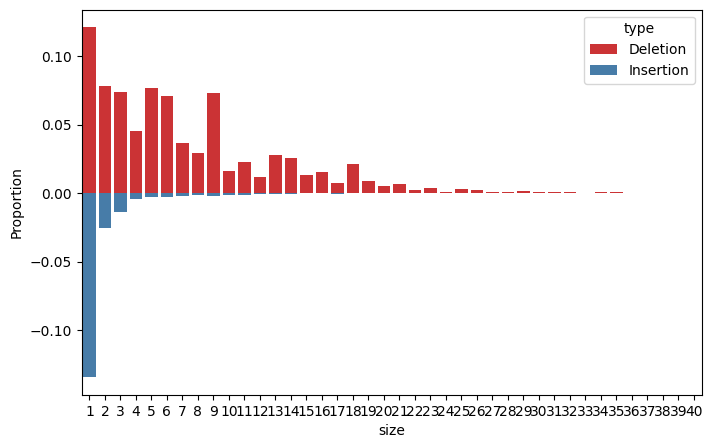

In [22]:
colors =[ '#377eb8' if x > 0 else '#e41a1c' for x in Indel_df['Proportion']]
plt.figure(figsize=(8, 5))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(8, 5)
sns.barplot(data=Indel_df,x='size', y='Proportion',hue='type', palette={'Insertion': '#377eb8', 'Deletion': '#e41a1c'}, dodge=False)
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure1/In_vitro_3T3_indel_length_distribution.pdf')

# eidted reads VS evolving barcode (EP)

In [64]:
import os
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [65]:
main_dir = '/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC_downsampling'

In [66]:
proportion_dirs = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']

In [67]:
proportion_dirs = ['1']

In [68]:
Allele_number_list = []
proportion_list = []
edited_reads_list = []
gene_list = []
edited_ratio_list = []
for proportion_dir in proportion_dirs:
    for index in ['R701','R705','R709']:
        crispresso2_dir = main_dir + '/' + proportion_dir + '/' + index + '/' + 'crispresso2'
        gene_dirs = [ filename for filename in os.listdir(crispresso2_dir) if filename.endswith('Dox_r1') ]
        for gene_dir in gene_dirs:
            if 'Btf3' in gene_dir:
                Btf3_Dox_free_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/R705/crispresso2/CRISPResso_on_Btf3_2_Dox-free_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
                Btf3_Dox_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/EPC/R705/crispresso2/CRISPResso_on_Btf3_2_Dox_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
                Alleles_frequency_table = Btf3_Dox_AF[~Btf3_Dox_AF['Aligned_Sequence'].isin(Btf3_Dox_free_AF['Aligned_Sequence'])]
            else:    
                Alleles_file = [filename for filename in os.listdir(crispresso2_dir + '/' + gene_dir) if filename.startswith('Alleles_frequency_table_around')][0]
                Alleles_frequency_table = pd.read_csv(crispresso2_dir + '/' + gene_dir + '/' + Alleles_file,sep='\t')
            Allele_number = Alleles_frequency_table[(Alleles_frequency_table['Unedited']==False) &(Alleles_frequency_table['#Reads']>10)].shape[0]
            Allele_number_list.append(Allele_number)
            edited_reads = Alleles_frequency_table[(Alleles_frequency_table['Unedited']==False) &(Alleles_frequency_table['#Reads']>10)]['#Reads'].sum()
            edited_reads_list.append(edited_reads)
            gene = gene_dir.split('_')[2].split('-')[0]
            gene_list.append(gene)
            proportion_list.append(proportion_dir)
            edited_ratio = Alleles_frequency_table[(Alleles_frequency_table['Unedited']==False) &(Alleles_frequency_table['#Reads']>10)]['%Reads'].sum()/100
            edited_ratio_list.append(edited_ratio)


In [69]:
data = {'Allele_number':Allele_number_list,'edited_reads':edited_reads_list,'gene':gene_list,'proportion':proportion_list,'edited_ratio':edited_ratio_list}
Allele_info = pd.DataFrame(data)
Allele_info

,Allele_number,edited_reads,gene,proportion,edited_ratio
0,1424,1529643,Rpl39,1,0.344176
1,121,37111,Btf3,1,0.006528
2,1502,1687025,Myl6,1,0.467738
3,856,1057024,Hint1,1,0.381981
4,377,477331,Calm2,1,0.124524
5,557,549117,Lgals1,1,0.136416
6,974,934519,Acta1,1,0.955611
7,252,268497,Slc25a3,1,0.086877
8,889,1037714,Tpt1,1,0.303914
9,157,168108,Calm1,1,0.079833


<Figure size 500x400 with 0 Axes>

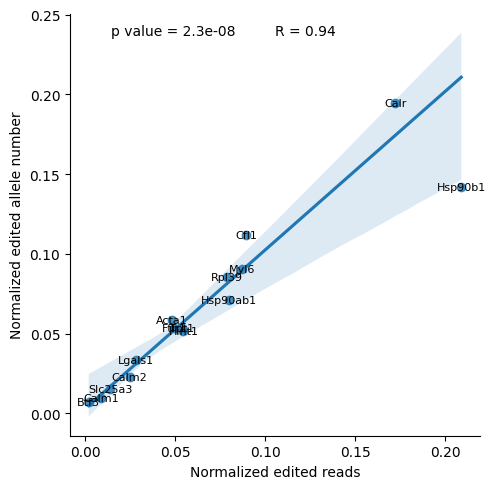

In [18]:
Allele_info['edited_reads'] = Allele_info['edited_reads']/sum(Allele_info['edited_reads'])
Allele_info['Allele_number'] = Allele_info['Allele_number']/sum(Allele_info['Allele_number'])
plt.figure(figsize=(5, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 4)

slope, intercept, r_value, p_value, std_err = stats.linregress(Allele_info['edited_reads'], Allele_info['Allele_number'])
r_squared, p_value = stats.spearmanr(Allele_info['edited_reads'], Allele_info['Allele_number'])
p_value = f'p value = {p_value:.1e}'
r_squared = f'R = {r_value:.2f}'
#equation = f'y = {slope*1e6:.2f}x + {intercept:.2f}'


sns.lmplot(data=Allele_info,x='edited_reads',y='Allele_number',lowess=False,ci=95,robust=True)
for i in range(Allele_info.shape[0]):
    plt.text(Allele_info['edited_reads'][i], Allele_info['Allele_number'][i], Allele_info['gene'][i], fontsize=8, ha='center', va='center')

plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, 0.95, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.ylabel('Normalized edited allele number')
plt.xlabel('Normalized edited reads')
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure1/edited_reads_VS_allele_number_EPC_ratio.pdf')

# eidted reads VS evolving barcode (3T3)

In [32]:
import os
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [51]:
main_dir = '/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/'

In [52]:
Allele_number_list = []
edited_reads_list = []
gene_list = []
edited_ratio_list = []
for index in ['R701','R705','R709']:
    crispresso2_dir = main_dir + '/' +  '/' + index + '/' + 'crispresso2'
    gene_dirs = [ filename for filename in os.listdir(crispresso2_dir) if filename.endswith('Dox_r1') ]
    for gene_dir in gene_dirs:
        if 'Btf3' in gene_dir:
            Btf3_Dox_free_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Btf3_2_Dox-free_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
            Btf3_Dox_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Btf3_2_Dox_r1/Alleles_frequency_table_around_sgRNA_AGCCCCCGGACACTGCAGCT.txt',sep='\t')
            Alleles_frequency_table = Btf3_Dox_AF[~Btf3_Dox_AF['Aligned_Sequence'].isin(Btf3_Dox_free_AF['Aligned_Sequence'])]
            print('Btf3')

        elif 'Tpt1' in gene_dir: 
            Tpt1_Dox_free_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Tpt1_1_Dox-free_r1/Alleles_frequency_table_around_sgRNA_TGATTTATTTGGAGTGGTGG.txt',sep='\t')
            Tpt1_Dox_AF = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/T1_in_vitro/3T3/R705/crispresso2/CRISPResso_on_Tpt1_1_Dox_r1/Alleles_frequency_table_around_sgRNA_TGATTTATTTGGAGTGGTGG.txt',sep='\t')
            Alleles_frequency_table = Tpt1_Dox_AF[~Tpt1_Dox_AF['Aligned_Sequence'].isin(Tpt1_Dox_free_AF['Aligned_Sequence'])]
            print('Tpt1')
        else:
            Alleles_file = [filename for filename in os.listdir(crispresso2_dir + '/' + gene_dir) if filename.startswith('Alleles_frequency_table_around')][0]
            Alleles_frequency_table = pd.read_csv(crispresso2_dir + '/' + gene_dir + '/' + Alleles_file,sep='\t')
        Allele_number = Alleles_frequency_table[(Alleles_frequency_table['Unedited']==False) &(Alleles_frequency_table['#Reads']>10)].shape[0]
        Allele_number_list.append(Allele_number)
        edited_reads = Alleles_frequency_table[(Alleles_frequency_table['Unedited']==False) &(Alleles_frequency_table['#Reads']>10)]['#Reads'].sum()
        edited_reads_list.append(edited_reads)
        gene = gene_dir.split('_')[2].split('-')[0]
        gene_list.append(gene)
        edited_ratio = Alleles_frequency_table[(Alleles_frequency_table['Unedited']==False) &(Alleles_frequency_table['#Reads']>10)]['%Reads'].sum()/100
        edited_ratio_list.append(edited_ratio)


Btf3
Tpt1


In [55]:
data = {'Allele_number':Allele_number_list,'edited_reads':edited_reads_list,'gene':gene_list,'edited_ratio':edited_ratio_list}
Allele_info = pd.DataFrame(data)
Allele_info

,Allele_number,edited_reads,gene,edited_ratio
0,434,342458,Rpl39,0.122582
1,13,2457,Btf3,0.000777
2,325,175407,Myl6,0.067163
3,293,340303,Hint1,0.074859
4,132,128885,Calm2,0.045603
5,178,171470,Lgals1,0.061727
6,1356,1252111,Acta1,0.399632
7,34,12002,Slc25a3,0.002922
8,792,249298,Tpt1,0.051065
9,19,5293,Calm1,0.003017


<Figure size 500x400 with 0 Axes>

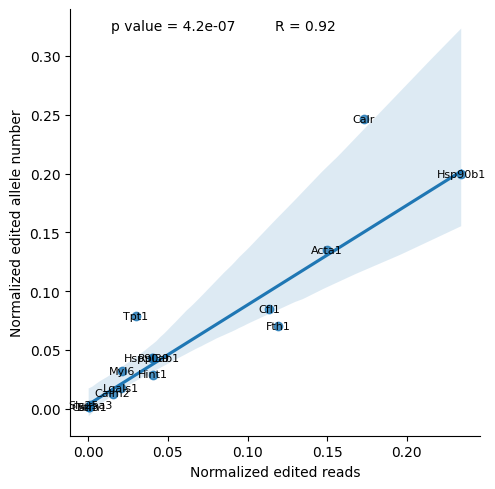

In [61]:
Allele_info['edited_reads'] = Allele_info['edited_reads']/sum(Allele_info['edited_reads'])
Allele_info['Allele_number'] = Allele_info['Allele_number']/sum(Allele_info['Allele_number'])
plt.figure(figsize=(5, 4))
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(5, 4)

slope, intercept, r_value, p_value, std_err = stats.linregress(Allele_info['edited_reads'], Allele_info['Allele_number'])
r_squared, p_value = stats.spearmanr(Allele_info['edited_reads'], Allele_info['Allele_number'])
p_value = f'p value = {p_value:.1e}'
r_squared = f'R = {r_value:.2f}'
#equation = f'y = {slope*1e6:.2f}x + {intercept:.2f}'


sns.lmplot(data=Allele_info,x='edited_reads',y='Allele_number',lowess=False,ci=95,robust=True)
for i in range(Allele_info.shape[0]):
    plt.text(Allele_info['edited_reads'][i], Allele_info['Allele_number'][i], Allele_info['gene'][i], fontsize=8, ha='center', va='center')

plt.text(0.1, 0.95, p_value, transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, 0.95, r_squared, transform=plt.gca().transAxes, fontsize=10)    
plt.ylabel('Normalized edited allele number')
plt.xlabel('Normalized edited reads')
plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure1/edited_reads_VS_allele_number_3T3_ratio.pdf')